<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

As an SAT prep program we are always trying to increase our students SAT scores. What factors impact student's overall SAT score. Do states where more people take the test do better on the exam? Do some prospectve majors do better than others? By learning the answer to these questions we hope to better able to help our students succeed.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis and Data Visualization](#Exploratory-Data-Analysis-and-Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT is a standardized test that many colleges and universities in the United States requires for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). Both sections have a score range from 200-800 so the overall test has a range of 400-1600. The alternative test, ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)).
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Students can go to test prep organizations to help them prepare for the exam of their choice. 

### Data

To answer this question we will use the following datasets. 

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State 
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major 


In [175]:
# Import the libraries needed for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning
We have to import tne data and then clean it so it is ready to be used for our analysis

In [177]:
# import data 
sat_2019_df = pd.read_csv('../data/sat_2019.csv')
act_2019_df = pd.read_csv('../data/act_2019.csv')

In [256]:
majors_df=pd.read_csv('../data/sat_2019_by_intended_college_major.csv')

In [257]:
#take a look at the major data to see what information is there
majors_df.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


The data contains intended major, test taken by major, the percent of overall test taken by the major, and the overall plus component scores.

In [258]:
# check out the data types and see if there are any null values
majors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


No null values in our dataset. The last 3 categories are integers.

In [259]:
# dictionary so we can rename the columns
new_columns_dict_1 = {
    'IntendedCollegeMajor': 'major',
    'TestTakers': 'test_takers',
    'Percent': 'percent',
    'Total': 'sat_score',
    'ReadingWriting': 'reading_writing',
    'Math': 'math',
}

In [260]:
# rename columns
majors_df.rename(columns = new_columns_dict_1,
         inplace = True)

In [261]:
#check to make sure it worked
majors_df.head()

,major,test_takers,percent,sat_score,reading_writing,math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


The SAT and ACT data for 2019 also needs to be cleaned

In [216]:
sat_2019_df.head() #check the dataset

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


We have the state, the participation rate, and the scores by component and overall.

In [183]:
sat_2019_df.info() # check for nas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


Participation Rate is a string. It needs to be changed to a float. First I ran value counts to make sure all the values were numbers followed by percentages

In [184]:
sat_2019_df['Participation Rate'].value_counts() #check to make sure no issues in string

100%    8
3%      6
4%      5
68%     3
99%     2
—       2
66%     2
51%     2
82%     2
7%      2
70%     2
81%     1
22%     1
41%     1
79%     1
19%     1
2%      1
31%     1
20%     1
63%     1
95%     1
9%      1
5%      1
54%     1
18%     1
6%      1
71%     1
94%     1
Name: Participation Rate, dtype: int64

There are two values that are dashes. It turns out that Puerto Rico and the Virgin Islands dont report participation rate. They have to be removed from the dataset or the function to convert the strings to floats will not work

In [ ]:
sat_2019_df.drop(39, axis =0, inplace = True) #droping Puerto Rico

In [219]:
sat_2019_df.drop(47, axis =0, inplace = True) # droping Virgin Islands

In [221]:
sat_2019_df.reset_index(drop=True, inplace=True)
#reset index so it will be possible to merge the data with the act data.

The same process will have to be done with the ACT data so we can compare performance on the two tests. 

In [222]:
act_2019_df.head() #check the dataset

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [223]:
act_2019_df.info() # check for nas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


Participation needs to be changed to a float like the SAT dataset. The ACT dataset has a national average line. Since we are interested in comparing it to the SAT state by state that line is not needed. 

In [224]:
act_2019_df.drop(51, axis =0, inplace = True) # remove national average

In [225]:
act_2019_df.reset_index(drop=True, inplace=True) # set up a data merge

In [231]:
def data_clean(num):
    return float(num.strip('%'))/100 

The function above will remove the % sign from the data and turn the participation columns into floats as decimals

In [228]:
sat_2019_df['Participation Rate']=sat_2019_df['Participation Rate'].apply(data_clean)

In [229]:
act_2019_df['Participation']=act_2019_df['Participation'].apply(data_clean)

Now that the data has been cleaned the sat test and act test datasets need to be merged. 

In [232]:
test_2019_df =sat_2019_df.join(act_2019_df, lsuffix="_left", rsuffix="_right") #merge dataframes

In [233]:
test_2019_df.head() #check to make sure it worked

,State_left,Participation Rate,EBRW,Math,Total,State_right,Participation,Composite
0,Alabama,0.07,583,560,1143,Alabama,1.00,18.9
1,Alaska,0.41,556,541,1097,Alaska,0.38,20.1
2,Arizona,0.31,569,565,1134,Arizona,0.73,19.0
3,Arkansas,0.06,582,559,1141,Arkansas,1.00,19.3
4,California,0.63,534,531,1065,California,0.23,22.6


This contains two state columns so one can be removed. Then the column names will be fixed. 

In [234]:
test_2019_df.drop(columns =[ 'State_right'], inplace =True )

In [238]:
new_columns_dict_2 = {
    'State_left': 'state',
    'Participation Rate': 'sat_participation',
    'EBRW': 'reading_writing',
    'Math': 'math',
    'Total': 'sat_score',
    'Participation': 'act_participation',
    'Composite': 'act_score',
}

In [239]:
test_2019_df.rename(columns = new_columns_dict_2,
         inplace = True)

Now that all the data has been cleaned it is time for exploratory data analysis and data visualization


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2019 test|lists the state| 
|**sat_participation**|*float*|2019 test|percent of student in state that took the SAT (expressed as a decimal)|
|**reading_writing**|*integer*|2019 test|average SAT reading/writing score by state (range 200-800)|
|**math**|*integer*|2019 test|average SAT math score by state (range 200-800)|
|**sat_score**|*integer*|2019 test|average state score SAT (range 400-1600)| 
|**act_participation**|*float*|2019 test|percent of student in state that took the ACT (expressed as a decimal)|
|**act_score**|*integer*|2019 test|average score ACT (1-36)| 
|**major**|*object*|2019 major|prospective major of students taking SAT|
|**test_takers**|*object*|2019 major|number of test takers for each prospective major| 
|**percent**|*object*|2019 major|percent of all SAT test takers who picked that major|
|**sat_score**|*integer*|2019 major|average SAT score by major (range 400-1600).| 
|**reading_writing**|*integer*|2019 major|average SAT reading/writing score by major (range 200-800)|
|**math**|*integer*|2019 major|average SAT math score by major (range 200-800)| 

## Exploratory Data Analysis and Data Visualization

The first question is how student success varies across states. Do students do better in states with higher participation? Are some states better at prep than others? If they are we may need to provide better resources to students in states that tend to be less successful

In [242]:
test_2019_df.describe() #summary stats

,sat_participation,reading_writing,math,sat_score,act_participation,act_score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431,0.586667,21.464706
std,0.387476,46.248035,51.290553,97.197910,0.345159,2.194523
min,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.055000,527.500000,511.500000,1038.000000,0.245000,19.800000
50%,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.820000,612.000000,599.000000,1210.000000,1.000000,23.700000
max,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


The mean for sat score is a little above the median so the data may be slightly skewed. A histogram to check out the distribution of the scores might tell us more

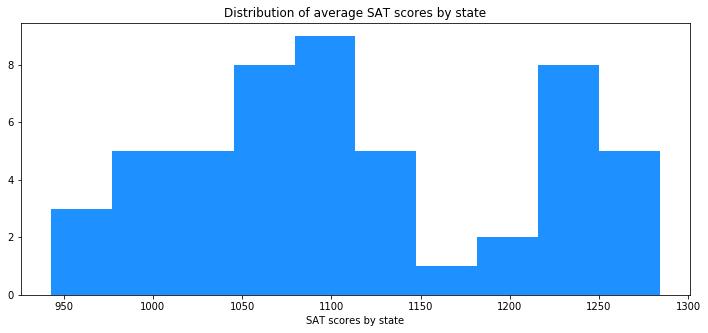

In [243]:
plt.figure(figsize = (12, 5)) #set a size
plt.hist(x = test_2019_df['sat_score'], color = 'dodgerblue');
plt.title('Distribution of average SAT scores by state');
plt.xlabel('SAT scores by state');


Interestingly the distribution is not normal. There appears to be a group of states that perform well and a group of states that do not perform as well with a gap between them. That is also true of the two component sections as shown by the two histograms below. The distribution looks like a mixture distribution. But the mixture distribution is a combination of two normals and this is all from the same data.

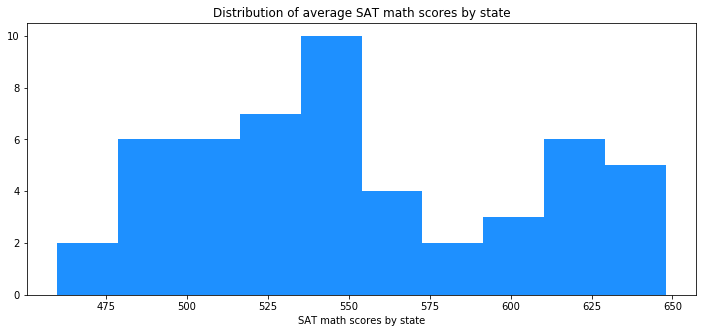

In [245]:
plt.figure(figsize = (12, 5))
plt.hist(x = test_2019_df['math'], color = 'dodgerblue');
plt.title('Distribution of average SAT math scores by state');
plt.xlabel('SAT math scores by state');

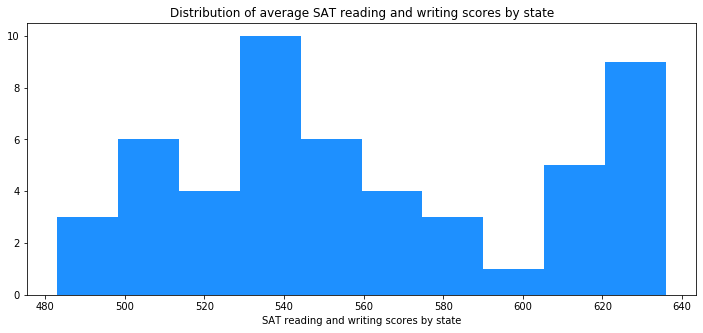

In [246]:
plt.figure(figsize = (12, 5))
plt.hist(x = test_2019_df['reading_writing'], color = 'dodgerblue');
plt.title('Distribution of average SAT reading and writing scores by state');
plt.xlabel('SAT reading and writing scores by state');

The fact that these have similar distributions to the overall score make sense. The ACT test scores have the same pattern. As does state participation for both exams.

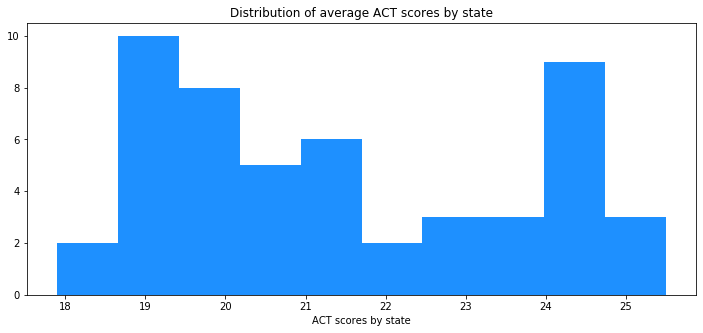

In [279]:
plt.figure(figsize = (12, 5))
plt.hist(x = test_2019_df['act_score'], color = 'dodgerblue');
plt.title('Distribution of average ACT scores by state');
plt.xlabel('ACT scores by state');

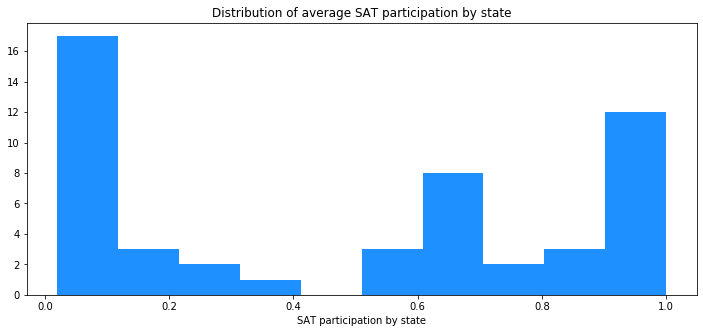

In [292]:
plt.figure(figsize = (12, 5))
plt.hist(x = test_2019_df['sat_participation'], color = 'dodgerblue');
plt.title('Distribution of average SAT participation by state');
plt.xlabel('SAT participation by state');

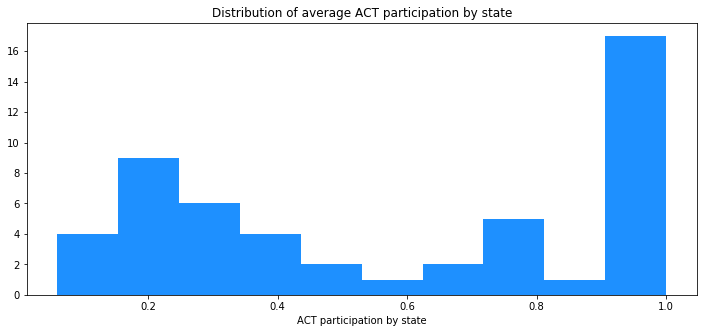

In [294]:
plt.figure(figsize = (12, 5))
plt.hist(x = test_2019_df['act_participation'], color = 'dodgerblue');
plt.title('Distribution of average ACT participation by state');
plt.xlabel('ACT participation by state');

It seems that most states have very high or very low participation for each exam. That might explain the SAT score distribution since it is very impacted by participation rate.

Using sorting we can see which states have the best overall performance. 

In [249]:
test_2019_df.sort_values('sat_score', ascending = False).head() #sort to show the states with the best average sat scores.

,state,sat_participation,reading_writing,math,sat_score,act_participation,act_score
23,Minnesota,0.04,636,648,1284,0.95,21.4
49,Wisconsin,0.03,635,648,1283,1.00,20.3
41,South Dakota,0.03,633,635,1268,0.75,21.6
34,North Dakota,0.02,627,636,1263,0.96,19.9
27,Nebraska,0.03,628,631,1260,1.00,20.0


They all have low participation scores. Does that trend continue through the rest of the data too? By looking at a heatmap we can see all the correlations between our variables. The closer a correlation is to 1 or -1 the more correlated the variables are. But correlation does not mean there is also causation

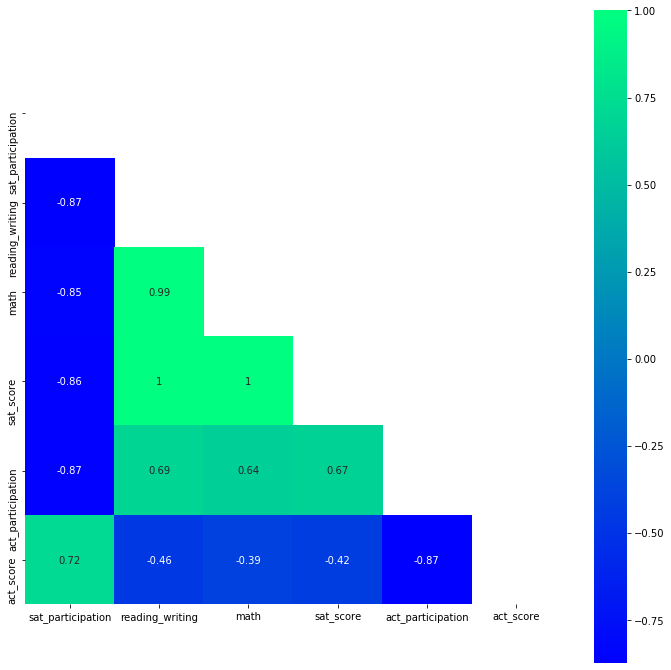

In [250]:
plt.figure(figsize = (12, 12))

# Get correlation of variables.
corr = test_2019_df.corr()
mask = np.zeros_like(corr) # hide the repeat correlations that occur in the table
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, cmap = 'winter', annot = True);

There is a strong negative correlation between SAT score and SAT participation. Perhaps in states with higher participation students who are not interested in college take the tests in school which drives down the average. This is not unique to the SAT. The ACT has a similar negative correlation between participation and score. By looking at a scatter plot we can get a close look at the relationship between test score and participation. 

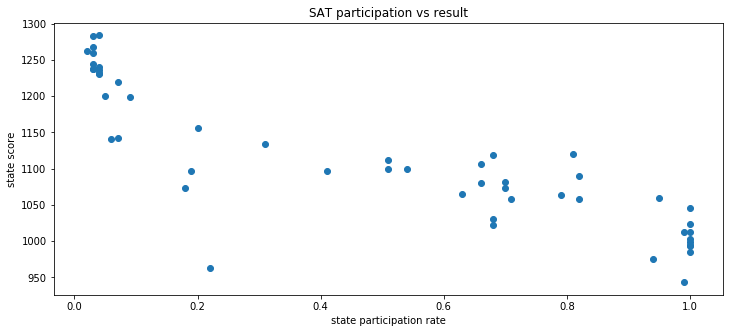

In [251]:
plt.figure(figsize = (12, 5))
plt.scatter(x = test_2019_df['sat_participation'], y = test_2019_df['sat_score'])
plt.title('SAT participation vs result')
plt.xlabel('state participation rate')
plt.ylabel('state score');

This scatter plot is what we would expect with a strong negative correlation. There do not appear to be any states with high participation that also have high SAT score

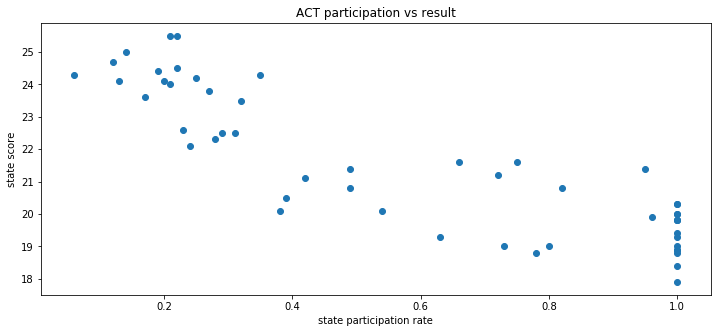

In [252]:
plt.figure(figsize = (12, 5))
plt.scatter(x = test_2019_df['act_participation'], y = test_2019_df['act_score'])
plt.title('ACT participation vs result')
plt.xlabel('state participation rate')
plt.ylabel('state score');

The same is true for the ACT. So being in a state with a high participation rate does not appear to give students a better chance for success. 

To find states that do a good job with test prep I looked for states that did well on both the SAT and the ACT. As the following scatter plot and the heatmap show there is a negative relationship between success on the two exams

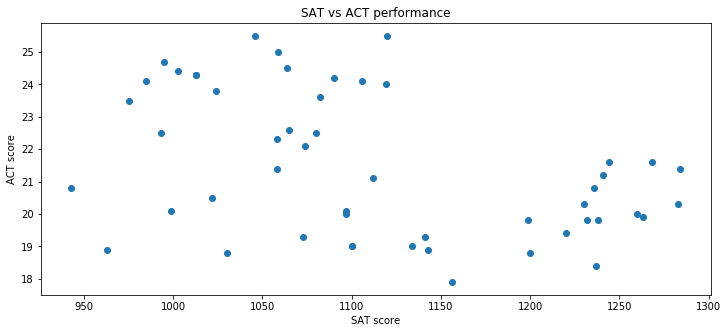

In [306]:
plt.figure(figsize = (12, 5))
plt.scatter(x = test_2019_df['sat_score'], y = test_2019_df['act_score'])
plt.title('SAT vs ACT performance')
plt.xlabel('SAT score')
plt.ylabel('ACT score');

There really are not any states that do well on both exams. Since the average score is so tied to participation rate whichever test a state takes more of they are worse at. There are 4 states that have over 50% SAT participation but still have an above average score.

In [308]:
test_2019_df[(test_2019_df['sat_score'] > 1100) & (test_2019_df['sat_participation'] > 0.5)]

,state,sat_participation,reading_writing,math,sat_score,act_participation,act_score
21,Massachusetts,0.81,559,561,1120,0.21,25.5
37,Oregon,0.51,562,550,1112,0.42,21.1
45,Vermont,0.66,560,546,1106,0.20,24.1
46,Virginia,0.68,567,551,1119,0.21,24.0


It might be worth studying what these states do for SAT test prep since it is very unusual to have a good SAT score with high participation.

The next question is if students in some intended majors do better on the SAT than other intended majors. To start with here are the summary statistics for the majors dataset. 

In [296]:
majors_df.describe()

,sat_score,reading_writing,math,diff
count,38.000000,38.000000,38.000000,38.000000
mean,1058.500000,535.500000,523.000000,-12.500000
std,82.445969,41.362439,43.386385,19.727536
min,916.000000,458.000000,456.000000,-52.000000
25%,988.250000,501.250000,486.500000,-25.750000
50%,1066.500000,537.000000,527.000000,-15.000000
75%,1115.500000,569.750000,542.250000,-0.750000
max,1242.000000,597.000000,646.000000,49.000000


The mean score for the math section and the reading_writing section are very similar. The scores by major range from 916 to 1242 so major might have some impact. Below is distribution of average SAT score by intended major.

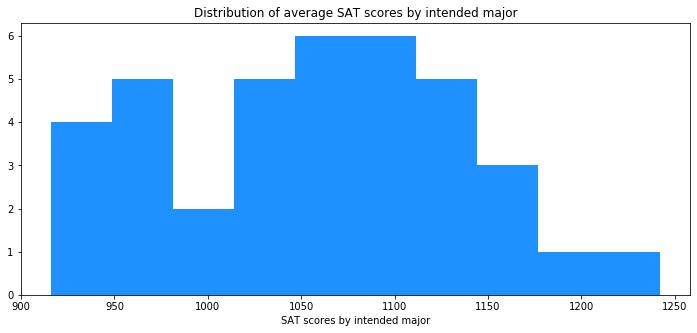

In [298]:
plt.figure(figsize = (12, 5))
plt.hist(x = majors_df['sat_score'], color = 'dodgerblue');
plt.title('Distribution of average SAT scores by intended major');
plt.xlabel('SAT scores by intended major');

This has a similar distribution to the data of SAT score by state. By sorting the data we can get a list of the indended majors that do the best on the exam.

In [273]:
majors_df.sort_values('sat_score', ascending =False).head()

,major,test_takers,percent,sat_score,reading_writing,math
19,Mathematics and Statistics,"16,508",1%,1242,597,646
27,Physical Sciences,"26,318",1%,1203,597,606
32,Social Sciences,"33,356",2%,1164,594,570
6,Computer and Information Sciences and Support ...,"79,736",4%,1156,571,585
22,Multi/Interdisciplinary Studies,"2,979",0%,1155,581,574


Mathematics and Statistics has the best SAT score. In general most of the top 5 are STEM fields. Perhaps students with those interests do better on the exam. It is probably easier to see this as a graph

In [270]:
top_majors = majors_df.sort_values(by = 'sat_score', ascending = False).head(10) # intended majors with best sat scores

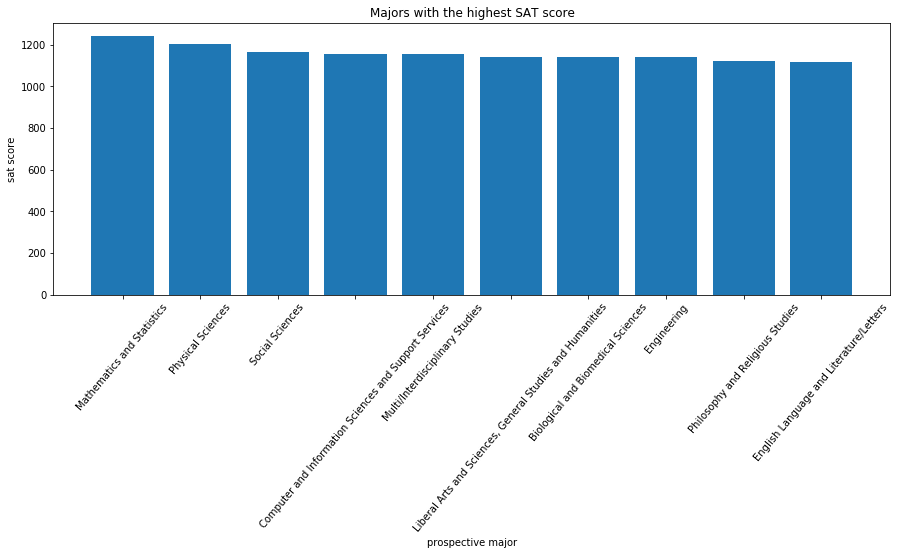

In [276]:
plt.figure(figsize = (15, 5))
plt.bar(x = top_majors['major'], height = top_majors['sat_score'])
plt.title('Majors with the highest SAT score');
# rotate labels
plt.xticks(rotation = 50);
# label our x and y
plt.xlabel('prospective major')
plt.ylabel('sat score');

This is hard to see. I am switching to a horizontal bar chart

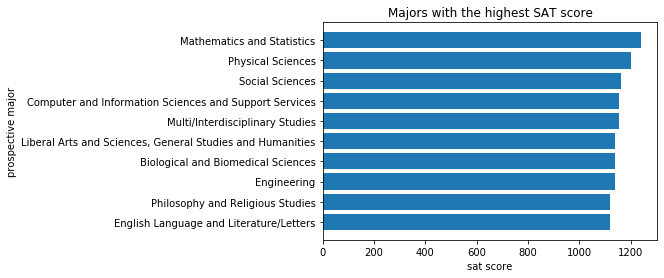

In [266]:
plt.barh(y = top_majors['major'][::-1], width = top_majors['sat_score'][::-1])
#horizontal bar chart easier to see
plt.title('Majors with the highest SAT score');
plt.ylabel('prospective major')
plt.xlabel('sat score');

As I said after the chart most of the top 10 are majors that are STEM related but there are some humanities fields represented. These students may be able to succeed already but the following list of intended majors with the lowest scores need more help. 

In [269]:
majors_df.sort_values('sat_score').head() # intended majors with worst sat scores

,major,test_takers,percent,sat_score,reading_writing,math
20,Mechanic and Repair Technologies/Technicians,"6,592",0%,916,458,458
7,"Construction Trades, General","2,500",0%,919,459,460
25,"Personal and Culinary Services, General","6,668",0%,929,474,456
28,Precision Production,319,0%,932,466,466
12,Family and Consumer Sciences/Human Sciences,"6,469",0%,953,484,469


Here are the intended majors with the worst SAT scores. By knowing this we can try and offer more resources to students in these majors. Now that we know who to target we can see if there are ways to help students who tend to pick these majors do better on tests. 

In [ ]:
low_majors = majors_df.sort_values(by = 'sat_score', ascending = True).head(10)

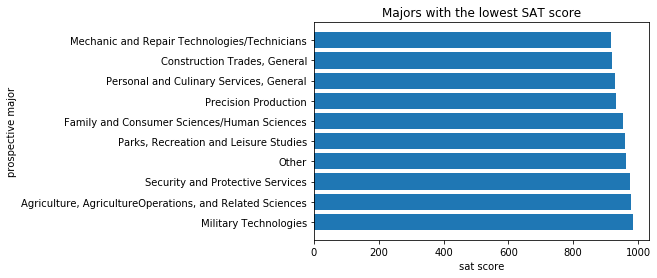

In [275]:
plt.barh(y = low_majors['major'][::-1], width = low_majors['sat_score'][::-1])
#horizontal bar chart easier to see
plt.title('Majors with the lowest SAT score');
plt.ylabel('prospective major')
plt.xlabel('sat score');

These are the majors where students will need the most help going forward. 

Another question is if different majors need more help with one of the two components. The heat map below shows the variable correlations

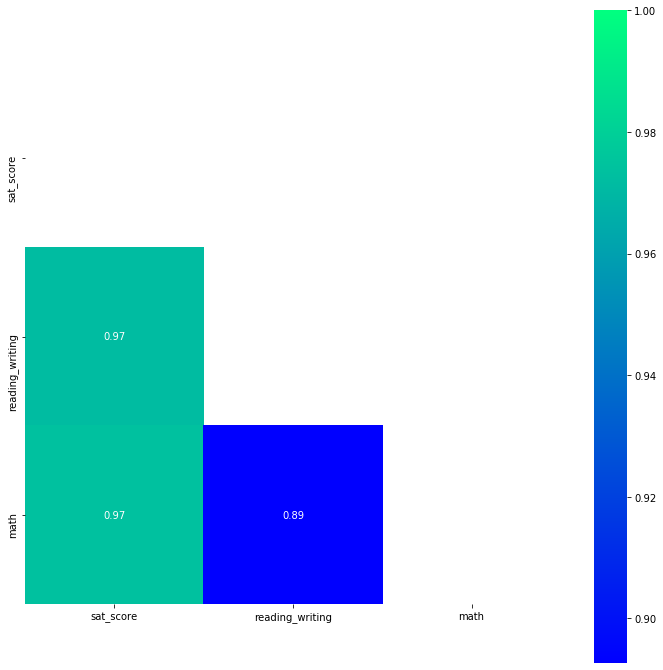

In [277]:
plt.figure(figsize = (12, 12))

corr = majors_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, cmap = 'winter', annot = True);

It actually appears that there is a high correlation between how students do on the reading and writing components. I expected that some majors would do much better on one section or another. A scatter plot will give a closer look at the connection.

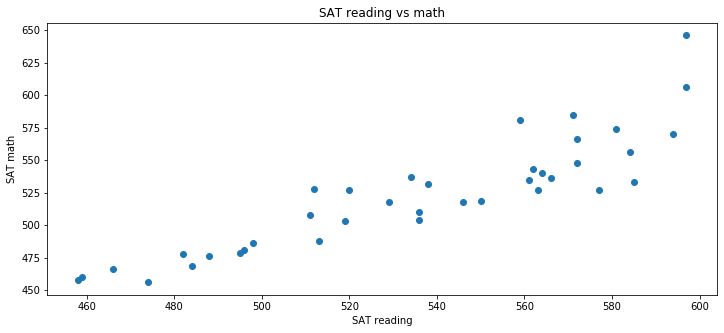

In [299]:
plt.figure(figsize = (12, 5))
plt.scatter(x = majors_df['reading_writing'], y = majors_df['math'])
plt.title('SAT reading vs math')
plt.xlabel('SAT reading')
plt.ylabel('SAT math');

The scatterplot also shows a high correlation between the two components among intended majors. To find if there are any intended majors with significant differences I created a new variable.

In [300]:
majors_df['diff']= majors_df['math']-majors_df['reading_writing'] # the difference between the components 

In [301]:
majors_df.head()

,major,test_takers,percent,sat_score,reading_writing,math,diff
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481,-15
1,Architecture and Related Services,"28,988",2%,1047,520,527,7
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504,-32
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566,-6
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537,3


The diff variable is how much better a group of students with the same intended major did on the math component than the reading and writing one.

In [302]:
top_reading =majors_df.sort_values('diff').head() #save the majors that do better on reading and writing than math

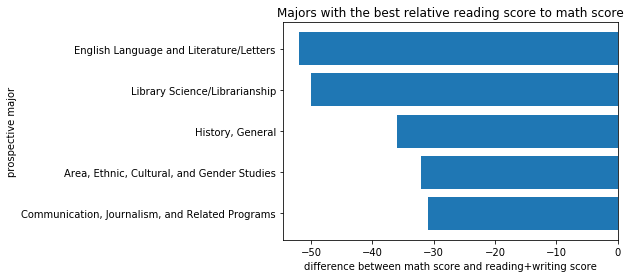

In [303]:
plt.barh(y = top_reading['major'][::-1], width = top_reading['diff'][::-1])
#horizontal bar chart easier to see
plt.title('Majors with the best relative reading score to math score');
plt.ylabel('prospective major')
plt.xlabel('difference between math score and reading+writing score');

The negative number means students with these intended majors do worse on the math component than the reading and writing one. A common theme is that these are considered humanities majors. Perhaps for students who are more interesed in the humanities we should give them more math prep. 

In [304]:
top_math=majors_df.sort_values('diff').tail() # save majors that are better at math

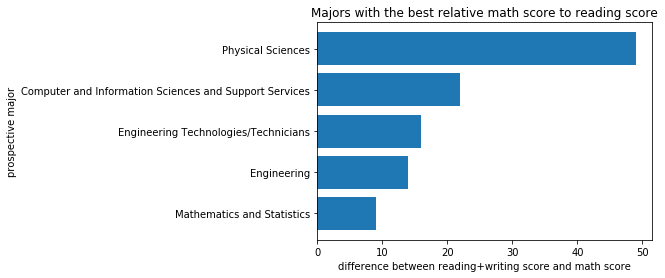

In [305]:
plt.barh(y = top_math['major'][::-1], width = top_math['diff'])
#horizontal bar chart easier to see
plt.title('Majors with the best relative math score to reading score');
plt.ylabel('prospective major')
plt.xlabel('difference between reading+writing score and math score');

The positive numbers mean that the students with these intended majors do better on the math component. They are all STEM majors which make sense. We may want to offer our students who want to go into STEM more reading and writing prep before they take the SAT.

## Conclusions and Recommendations

When picking which exam to take, students should not worry about participation rate in their state. The higher the participation rate the worse the scores for that state. The states with higher participation rates sometimes have all students take the test not just the ones who want to go to college.

Further research should be done on the states that have above average scores and high participation to see what they are doing for test prep. Perhaps some of that can be applied to our prep program.

Some prospective majors do better than others. We may need to work more with students with some prospective majors to help them improve their score. 

Students who intend to study STEM majors tend to do better. Is there something about how they study we can replicate with our other students? 

Students with intended majors in STEM tend to do better on the math component than the reading and writing component. Students with intended majors in humanities tend to do better on the reading and writing component then the math component. Perhaps we sould provide targeted training programs depending on intended majors. Humanities students get more math prep and stem students get more reading and writing prep. 

Further research should be done on other factors that are impacting SAT scores. Factors like poverty, deomgraphics, school district, gpas, and ap tests might have an impact that would cause us to come up with new recommendations. 

